# 1. 데이터세트
* Train/Test 수
    * 제품 당 이미지 수
* 이미지 크기
* 카테고리 수

# 2. K-fold Cross Validation

### 2-1. K-폴드 데이터 세트 분할
* `k`: 5로 설정
* `random_state` : 15 → 결과가 고르게 나온 편

In [6]:
ksplit = 5
kf = KFold(n_splits=ksplit, shuffle=True, random_state=15)

kfolds = list(kf.split(labels_df))

In [7]:
# 폴드 별 데이터세트 분할
folds = [f'split_{n}' for n in range(1, ksplit + 1)]
folds_df = pd.DataFrame(index=indx, columns=folds)

for idx, (train, val) in enumerate(kfolds, start=1):
    folds_df.loc[labels_df.iloc[train].index, f'split_{idx}'] = 'train'
    folds_df.loc[labels_df.iloc[val].index, f'split_{idx}'] = 'val'
folds_df.head(1)

,split_1,split_2,split_3,split_4,split_5
10060_0_m_1,train,train,train,val,train


In [10]:
fold_lbl_distrb = pd.DataFrame(index=folds, columns=cls_idx)
for n, (train_indices, val_indices) in enumerate(kfolds, start=1):
    train_totals = labels_df.iloc[train_indices].sum()
    val_totals = labels_df.iloc[val_indices].sum()

    ratio = val_totals / (train_totals + 1E-7) # 0으로 나누는 에러를 피하려고 작은 값 (1E-7) 추가
    fold_lbl_distrb.loc[f'split_{n}'] = ratio

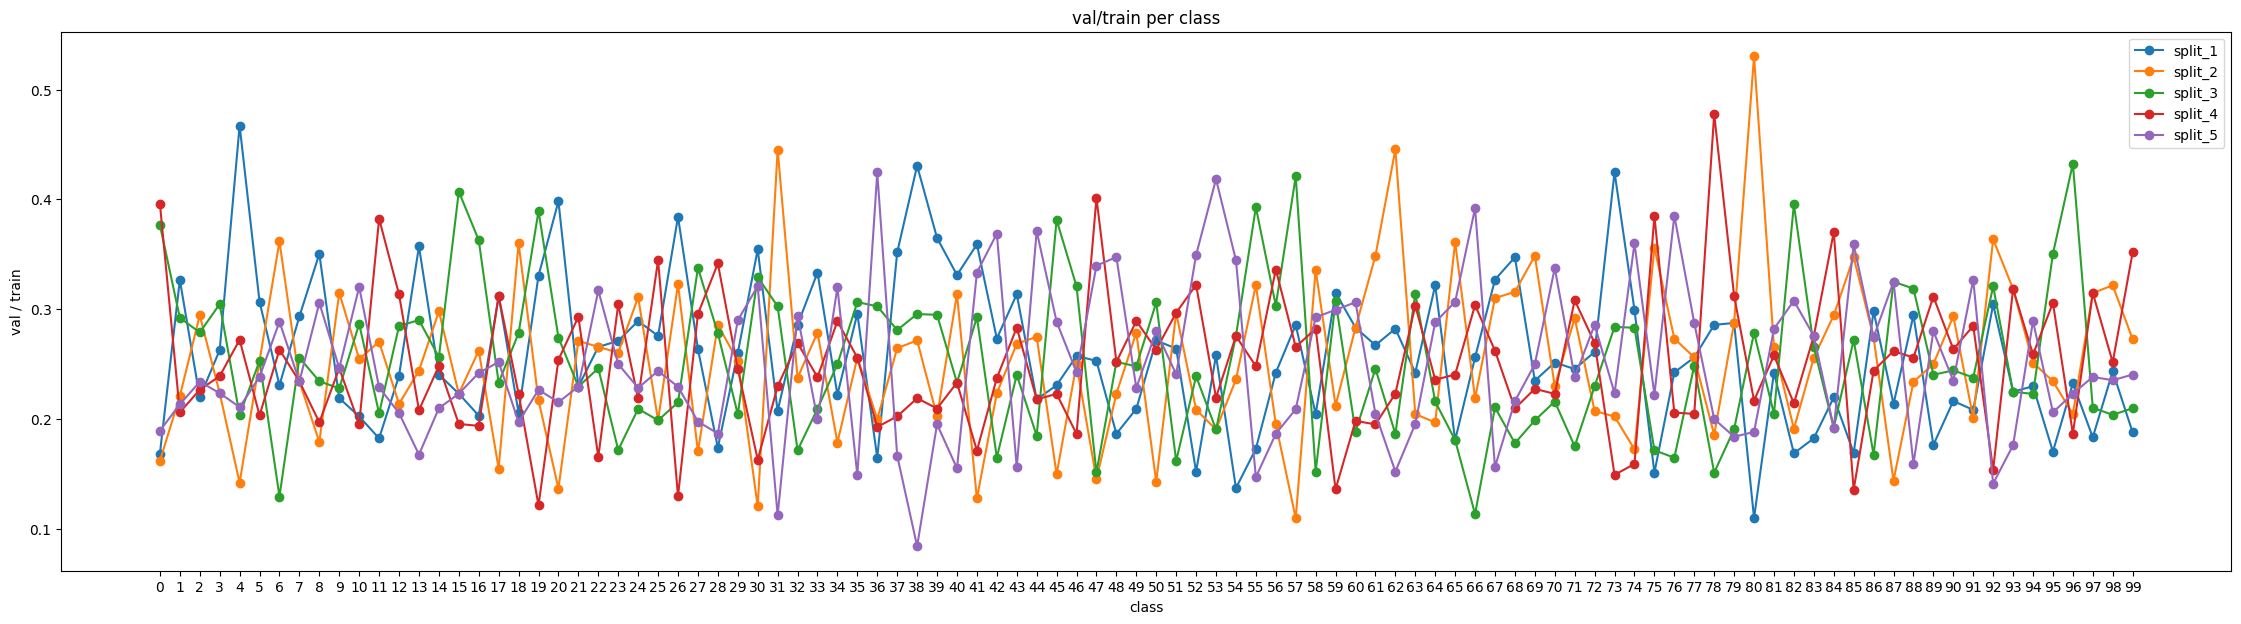

In [11]:
plt.rcParams["figure.figsize"] = (28,7)
plt.xlabel("class")
plt.ylabel("val / train")
plt.title("val/train per class")
plt.xticks(np.arange(0, 100, 1))
for i in range(0, 5):
    plt.plot(cls_idx, fold_lbl_distrb.iloc[i], "-o", label=fold_lbl_distrb.index[i])
plt.legend()

# 3. 모델
`YOLOv8m Pretrained Model` 사용
* 파라미터/가중치 수
* 최적화방식
* 학습 정보

In [26]:
from ultralytics import YOLO

In [8]:
model = YOLO("yolov8m.pt")
model.info()

YOLOv8m summary: 295 layers, 25902640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

# 4. 결과 분석
* 학습/검증
    * 평균 성능
    * fold 별 학습 결과
* 테스트
    * loss 및 성능

In [2]:
import pandas as pd
import os

In [9]:
PATH = "/home/j-i10a309/kofoos/train_01_24-02-04_c100_split_"
FILE_NAME = "results.csv"
pandas_list = []

In [17]:
for i in range(1, 6):
    pandas_list.append(pd.read_csv(os.path.join(PATH+str(i), FILE_NAME)))

In [22]:
pandas_list[5].iloc[-1]

                  epoch    188.000000
         train/box_loss      0.226710
         train/cls_loss      0.186560
         train/dfl_loss      0.890480
   metrics/precision(B)      0.973810
      metrics/recall(B)      0.991730
       metrics/mAP50(B)      0.993080
    metrics/mAP50-95(B)      0.986700
           val/box_loss      0.122500
           val/cls_loss      0.114020
           val/dfl_loss      0.788810
                 lr/pg0      0.000054
                 lr/pg1      0.000054
                 lr/pg2      0.000054
Name: 187, dtype: float64

In [24]:
last_row_values = []
for df in range(1, 6):
    last_row_values.append(pandas_list[i].iloc[-1])
average_values = pd.DataFrame(last_row_values).mean()

In [28]:
average_values

                  epoch    188.000000
         train/box_loss      0.226710
         train/cls_loss      0.186560
         train/dfl_loss      0.890480
   metrics/precision(B)      0.973810
      metrics/recall(B)      0.991730
       metrics/mAP50(B)      0.993080
    metrics/mAP50-95(B)      0.986700
           val/box_loss      0.122500
           val/cls_loss      0.114020
           val/dfl_loss      0.788810
                 lr/pg0      0.000054
                 lr/pg1      0.000054
                 lr/pg2      0.000054
dtype: float64